Import all the important modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import the data frame with all the important columns which effect the rate of house price in US

In [2]:
df = pd.read_csv(r"C:\Users\sagar\Downloads\Home_price_index.csv")

Check the shape of the data frame

In [3]:
df.shape

(92, 9)

Data Frame column names

In [4]:
df.columns

Index(['Date', 'Mortgage Average', 'Unemployment Rate', 'Housing Inventory',
       'Population Growth', 'Inflation', 'Permit-Issuing Places',
       'Median Household Income', 'Price'],
      dtype='object')

Drop Columns which is not required for the ML models

In [5]:
df = df.drop('Date',axis = 1)

Fill "NA" values with forward fill

In [6]:
df.isnull().sum()

Mortgage Average            0
Unemployment Rate           0
Housing Inventory           0
Population Growth          69
Inflation                  69
Permit-Issuing Places       0
Median Household Income    70
Price                       0
dtype: int64

In [7]:
df = df.fillna(method='ffill')

Check NA values in the Data frame

In [8]:
df.isnull().sum()

Mortgage Average           0
Unemployment Rate          0
Housing Inventory          0
Population Growth          0
Inflation                  0
Permit-Issuing Places      0
Median Household Income    0
Price                      0
dtype: int64

Check the correlation the data frame and also plot a heat map for visualization

In [9]:
df.corr()

,Mortgage Average,Unemployment Rate,Housing Inventory,Population Growth,Inflation,Permit-Issuing Places,Median Household Income,Price
Mortgage Average,1.000000,-0.289183,-0.811049,0.635879,0.257359,0.359120,-0.705010,-0.469061
Unemployment Rate,-0.289183,1.000000,0.031282,0.177335,-0.402189,-0.606142,-0.185951,-0.307772
Housing Inventory,-0.811049,0.031282,1.000000,-0.771436,0.123763,-0.316246,0.936284,0.821443
Population Growth,0.635879,0.177335,-0.771436,1.000000,-0.336552,0.065970,-0.798108,-0.724927
Inflation,0.257359,-0.402189,0.123763,-0.336552,1.000000,0.386807,0.235315,0.513766
Permit-Issuing Places,0.359120,-0.606142,-0.316246,0.065970,0.386807,1.000000,-0.074142,0.188586
Median Household Income,-0.705010,-0.185951,0.936284,-0.798108,0.235315,-0.074142,1.000000,0.887793
Price,-0.469061,-0.307772,0.821443,-0.724927,0.513766,0.188586,0.887793,1.000000


<AxesSubplot: >

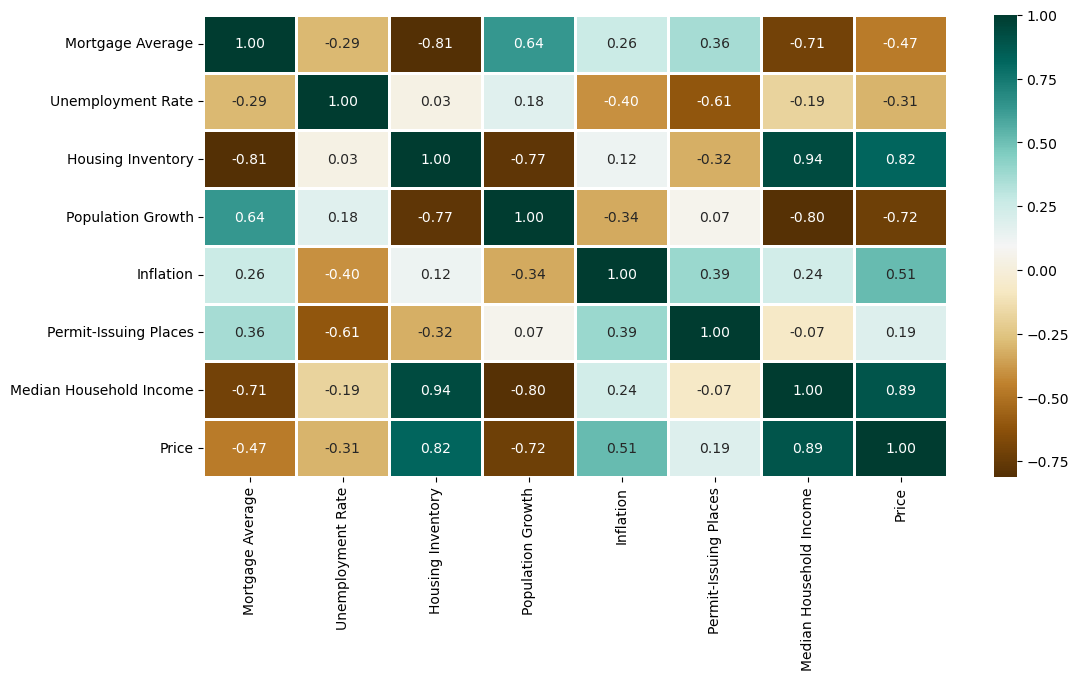

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

Machine learning models which can predict the home price

In [11]:
from sklearn.model_selection import train_test_split
 
X = df.drop(['Price'], axis=1)
Y = df['Price']
 
# Split the training set into
# training and validation set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.7, test_size=0.3, random_state=2)

Use Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("By using Linear Regression we got:")
print("Training data accuracy",lr_model.score(X_train, y_train))
print("Testing data accuracy",lr_model.score(X_test, y_test))

By using Linear Regression we got:
Training data accuracy 0.9762721807921758
Testing data accuracy 0.9626654707815229


2 8.492682276941707
3 8.492682276941707
4 8.492682276941707
5 8.492682276941707
6 8.492682276941707
7 8.492682276941707
8 8.492682276941707
9 8.492682276941707
10 8.492682276941707
11 8.492682276941707
12 8.492682276941707
13 8.492682276941707
14 8.492682276941707
15 8.492682276941707
16 8.492682276941707
17 8.492682276941707
18 8.492682276941707
19 8.492682276941707


<AxesSubplot: >

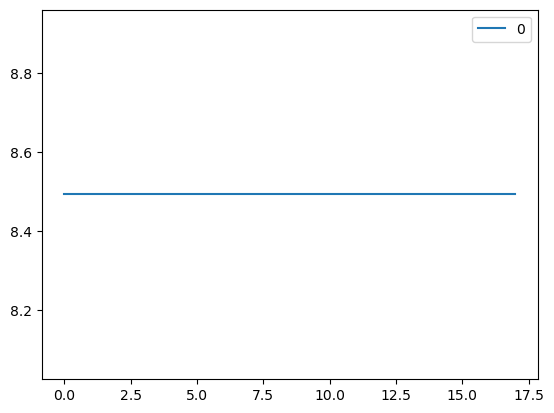

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = []

for k in range(2, 20):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    
    error = sqrt(mean_squared_error(y_test, y_pred))
    rmse.append(error)
    print(k, error)
    
graph = pd.DataFrame(rmse)
graph.plot()  

Use Random forest regression

In [14]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(X_train,y_train)
y_pred = rfm.predict(X_test)
print("By using Random Forest Regression we got:")
print("Training data accuracy",rfm.score(X_train,y_train))
print("Testing data accuracy",rfm.score(X_test,y_test))

By using Random Forest Regression we got:
Training data accuracy 0.9964916398758433
Testing data accuracy 0.9656225151047019


2 7.524807055715113
3 7.841457502211101
4 9.537387875398528
5 10.216833263521941
6 8.524428783912382
7 8.563686771925079
8 10.766999732672339
9 8.429865490161482
10 8.15589408331202
11 8.979038197842362
12 9.392464191528433
13 7.774127145147432
14 9.405631712895998
15 9.532033001663404
16 7.948675942334819
17 9.055960133363163
18 8.609376220413992
19 9.433511028275515


<AxesSubplot: >

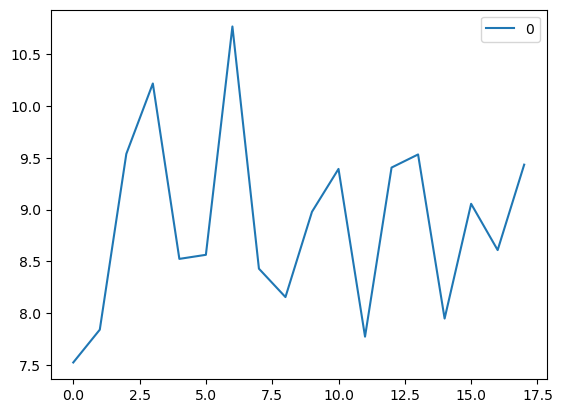

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = []

for k in range(2, 20):
    rfm=RandomForestRegressor()
    rfm.fit(X_train,y_train)
    y_pred = rfm.predict(X_test)
    
    error = sqrt(mean_squared_error(y_test, y_pred))
    rmse.append(error)
    print(k, error)
    
graph = pd.DataFrame(rmse)
graph.plot()  

**Final Insight from the Data**

With the above chart we can say the following features are effecting the home price in US
1. House inventory is directly effect the price of houses.
2. Inflation also effect the price of houses.
3. Median household income also effect the price of houses.

**Linear regression work fine with our Data with high accuracy**